<a href="https://colab.research.google.com/github/upiktrisalsa/biodata/blob/main/klasifikasi_orangutan_simpanse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset_path = "/content/drive/MyDrive/primata_dataset/train"


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='validation'
)


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.2500 - loss: 3.1853 - val_accuracy: 0.5000 - val_loss: 1.9672
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6250 - loss: 1.1639 - val_accuracy: 0.5000 - val_loss: 0.7742
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6833 - loss: 0.6346 - val_accuracy: 0.5000 - val_loss: 0.7922
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6417 - loss: 0.6307 - val_accuracy: 0.5000 - val_loss: 0.7042
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6333 - loss: 0.5647 - val_accuracy: 0.7500 - val_loss: 0.6456
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.4383 - val_accuracy: 0.5000 - val_loss: 0.6164
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2874 - val_accuracy: 0.7500 - val_loss: 0.5696
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.1645 - val_accuracy: 0.5000 - val_loss: 0.5863

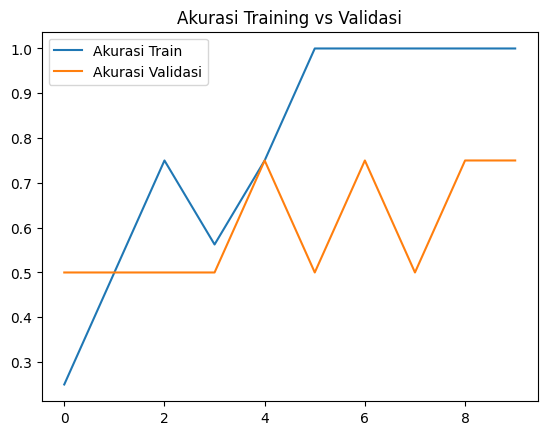

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title("Akurasi Training vs Validasi")
plt.show()


Saving images.jpg to images (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


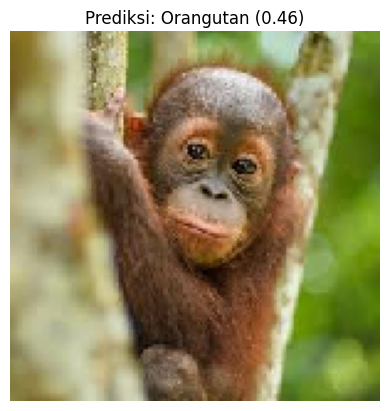

In [20]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    # 1. Load dan proses gambar
    img = image.load_img(fn, target_size=(150,150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 2. Prediksi
    prediction = model.predict(img_array)[0][0]
    label = "Simpanse" if prediction > 0.5 else "Orangutan"

    # 3. Tampilkan gambar
    plt.imshow(image.array_to_img(img_array[0]))
    plt.axis('off')
    plt.title(f"Prediksi: {label} ({prediction:.2f})")
    plt.show()
